In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from catboost import CatBoostClassifier

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve


## Catboost

In [2]:
## Read data for modelling
df = pd.read_csv('../data/final_data_for_modelling.csv')
## Remove not required columns
df.drop(columns=["patientid", "appointmentid",
                    "scheduledday", "appointmentday", "showed"] , inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110519 entries, 0 to 110518
Data columns (total 24 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   gender                                      110519 non-null  object 
 1   age                                         110519 non-null  int64  
 2   neighbourhood                               110519 non-null  object 
 3   scholarship                                 110519 non-null  int64  
 4   hypertension                                110519 non-null  int64  
 5   diabetes                                    110519 non-null  int64  
 6   alcoholism                                  110519 non-null  int64  
 7   handicap                                    110519 non-null  int64  
 8   sms_received                                110519 non-null  int64  
 9   days_between_appointment_and_scheduled_day  110519 non-null  int64  
 

In [3]:
# Splitting dataset into test and train

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["no_show"]), df["no_show"], random_state=0,test_size=0.2)


In [4]:
X_train.columns

Index(['gender', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'days_between_appointment_and_scheduled_day', 'age_group',
       'appointment_day_of_week', 'tempmax', 'temp', 'feelslikemax',
       'feelslike', 'humidity', 'windspeed', 'solarradiation', 'solarenergy',
       'uvindex', 'rating', 'previous_app'],
      dtype='object')

In [5]:
## Note the categorical features
cat_features = [0, 2, 7, 10, 11]
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110519 entries, 0 to 110518
Data columns (total 24 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   gender                                      110519 non-null  object 
 1   age                                         110519 non-null  int64  
 2   neighbourhood                               110519 non-null  object 
 3   scholarship                                 110519 non-null  int64  
 4   hypertension                                110519 non-null  int64  
 5   diabetes                                    110519 non-null  int64  
 6   alcoholism                                  110519 non-null  int64  
 7   handicap                                    110519 non-null  int64  
 8   sms_received                                110519 non-null  int64  
 9   days_between_appointment_and_scheduled_day  110519 non-null  int64  
 

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,days_between_appointment_and_scheduled_day,...,feelslikemax,feelslike,humidity,windspeed,solarradiation,solarenergy,uvindex,rating,previous_app,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,...,75.2,73.3,76.7,16.1,52.9,4.3,2.0,4.5,1,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,...,75.2,73.3,76.7,16.1,52.9,4.3,2.0,4.5,1,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,...,75.2,73.3,76.7,16.1,52.9,4.3,2.0,5.0,1,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,...,75.2,73.3,76.7,16.1,52.9,4.3,2.0,5.0,1,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,...,75.2,73.3,76.7,16.1,52.9,4.3,2.0,4.5,0,0


In [6]:
## Build cat boost classifier

clf = CatBoostClassifier()
params = {'iterations': [500],
          'depth': [4, 5, 6],
          'loss_function': ['Logloss', 'CrossEntropy'],
          'l2_leaf_reg': np.logspace(-20, -19, 3),
          'leaf_estimation_iterations': [10],
          #'eval_metric': ['recall'],
          'logging_level':['Silent'],
          'random_seed': [0]
         }
grid_search = GridSearchCV(estimator=clf, param_grid=params, scoring="f1", cv=3, verbose=2)
print(X_train.info())
grid_search.fit(X_train, y_train, cat_features=cat_features)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88415 entries, 82584 to 68268
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   gender                                      88415 non-null  object 
 1   age                                         88415 non-null  int64  
 2   neighbourhood                               88415 non-null  object 
 3   scholarship                                 88415 non-null  int64  
 4   hypertension                                88415 non-null  int64  
 5   diabetes                                    88415 non-null  int64  
 6   alcoholism                                  88415 non-null  int64  
 7   handicap                                    88415 non-null  int64  
 8   sms_received                                88415 non-null  int64  
 9   days_between_appointment_and_scheduled_day  88415 non-null  int64  
 10  age_gr

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x2907593d0>,
             param_grid={'depth': [4, 5, 6], 'iterations': [500],
                         'l2_leaf_reg': array([1.00000000e-20, 3.16227766e-20, 1.00000000e-19]),
                         'leaf_estimation_iterations': [10],
                         'logging_level': ['Silent'],
                         'loss_function': ['Logloss', 'CrossEntropy'],
                         'random_seed': [0]},
             scoring='f1', verbose=2)

In [7]:
## Train the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train, cat_features=cat_features)

## Classsification report
y_pred_train = best_model.predict(X_train)
print(f"Train Report")
print(classification_report(y_train, y_pred_train))
y_pred_test = best_model.predict(X_test)
print("Test Report")
print(classification_report(y_test, y_pred_test))

Train Report
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     70549
           1       0.80      0.03      0.05     17866

    accuracy                           0.80     88415
   macro avg       0.80      0.51      0.47     88415
weighted avg       0.80      0.80      0.72     88415

Test Report
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17658
           1       0.59      0.01      0.03      4446

    accuracy                           0.80     22104
   macro avg       0.69      0.51      0.46     22104
weighted avg       0.76      0.80      0.72     22104



In [8]:
## Plot PR Curve

def plot_pr_curve(y_test, y_test_prob):

    #calculate precision and recall
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_prob)

    #create precision recall curve
    fig, ax = plt.subplots()
    ax.plot(thresholds, precision[:-1], color='purple')
    ax.plot(thresholds, recall[:-1], color='green')

    #add axis labels to plot
    ax.set_title('Precision-Recall Curve')
    ax.set_ylabel('Precision/Recall')
    ax.set_xlabel('Threshold')

    #display plot
    plt.show()

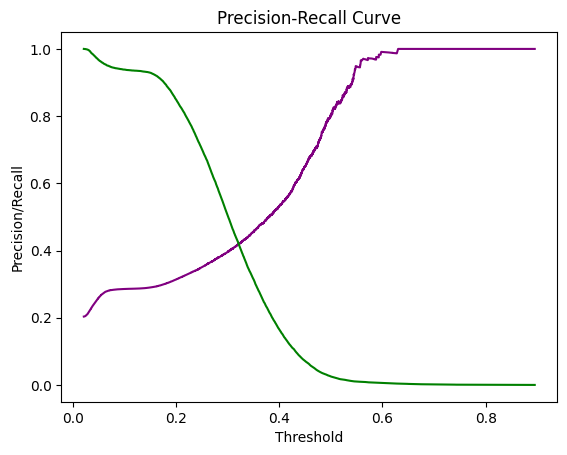

In [9]:
## Plot PR for train data
y_pred_probs = best_model.predict_proba(X_train)
y_pred_probs = y_pred_probs[:, 1]

plot_pr_curve(y_train, y_pred_probs)

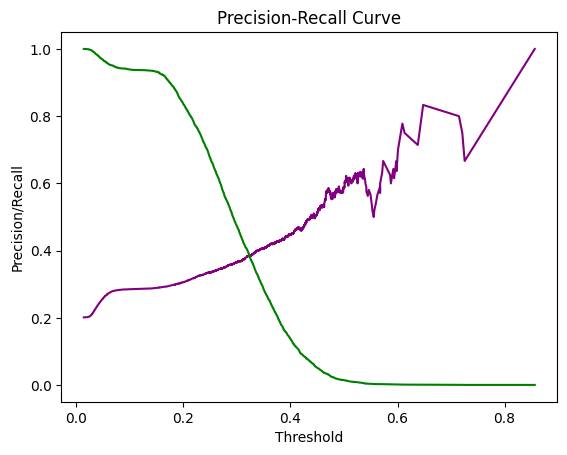

In [10]:
## Plot PR for test data
y_pred_probs = best_model.predict_proba(X_test)
y_pred_probs = y_pred_probs[:, 1]

plot_pr_curve(y_test, y_pred_probs)

In [11]:
## Feature Importances
importances = best_model.feature_importances_
forest_importances = pd.Series(importances, index=X_train.columns)
forest_importances.sort_values(ascending=False)

days_between_appointment_and_scheduled_day    33.484525
age                                            8.357786
neighbourhood                                  7.739610
previous_app                                   7.180949
age_group                                      6.326119
appointment_day_of_week                        3.942166
handicap                                       3.594434
humidity                                       3.447365
alcoholism                                     2.976645
windspeed                                      2.815639
feelslikemax                                   2.575735
rating                                         1.952754
temp                                           1.945171
feelslike                                      1.895205
solarenergy                                    1.722038
tempmax                                        1.691943
solarradiation                                 1.690148
sms_received                                   1